$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [2]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

cpu
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'setuptools>=70.0.0', 'urllib3>=2.5.0 ; python_version > "3.8"'] not found, attempting AutoUpdate...


Using cache found in /home/eden/.cache/torch/hub/ultralytics_yolov5_master


WARNING ⚠️ Retry 1/2 failed: Command 'pip install --no-cache-dir "gitpython>=3.1.30" "pillow>=10.3.0" "setuptools>=70.0.0" "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.
WARNING ⚠️ Retry 2/2 failed: Command 'pip install --no-cache-dir "gitpython>=3.1.30" "pillow>=10.3.0" "setuptools>=70.0.0" "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.
WARNING ⚠️ requirements: ❌ Command 'pip install --no-cache-dir "gitpython>=3.1.30" "pillow>=10.3.0" "setuptools>=70.0.0" "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.


YOLOv5 🚀 2025-12-12 Python-3.8.12 torch-1.10.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Look at the inference results and answer the question below.


inference output img 1:
image 1/1: 183x275 2 persons, 1 surfboard
Speed: 38.6ms pre-process, 84.0ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)
         xmin       ymin        xmax        ymax  confidence  class       name
0  100.278389  47.370995  187.863510  118.462662    0.903491      0     person
1   22.531363  20.887987  128.905212   92.257042    0.500974      0     person
2   85.617989  98.014694  139.018356  124.627922    0.367015     37  surfboard


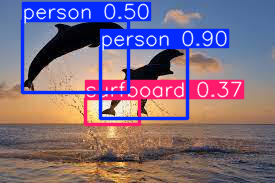

inference output img 2:
image 1/1: 750x750 2 cats, 1 dog
Speed: 18.4ms pre-process, 93.0ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
         xmin        ymin        xmax        ymax  confidence  class name
0   11.568582  115.774864  312.757111  667.323792    0.655976     15  cat
1  363.715485  290.178558  750.000000  721.983826    0.509416     16  dog
2  311.190735  102.437531  595.031738  687.870605    0.391701     15  cat


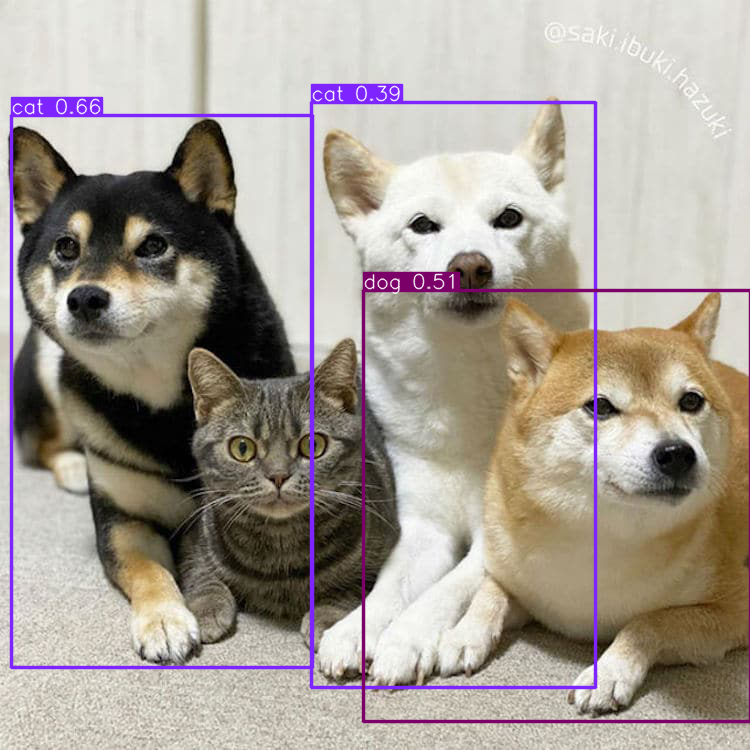

In [5]:
with torch.no_grad():
    #Detecting objects using YOLOv5
    objs_img1 = model(img1)
    objs_img2 = model(img2)

    #Printing inference output1 with bounding boxes
    print('inference output img 1:')
    print(objs_img1)
    print(objs_img1.pandas().xyxy[0])
    objs_img1.show()

    #Printing inference output2 with bounding boxes
    print('inference output img 2:')
    print(objs_img2)
    print(objs_img2.pandas().xyxy[0])
    objs_img2.show()

### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures? with what confidance?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.
3. recall that we learned how to fool a model by adverserial attack (PGD), describe how you would attack an Object Detection model (such as YOLO).

In [6]:
#====
from cs236781.answers import display_answer
import hw2.answers
#====

display_answer(hw2.answers.part6_q1)


**Your answer:**

**Question 1**

The model detected pretty poorly. It did not detect all objects correctly (and even missed the cat), and it miss-classified all of them (except one dog with low confidance).

Some false classifications came with pretty high confidance levels (one dog as a cat, and one dolphin as a person.



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

In [ ]:
# You can change the images names in the code below, and add new ones

images = [
    "imgs/ChangeMe1.jpg",
    "imgs/ChangeMe2.jpg",
    "imgs/ChangeMe3.jpg"
]

with torch.no_grad():
    for img in images:
        objs_img = model(img)
        print(objs_img)
        print(objs_img.pandas().xyxy[0])
        objs_img.show()

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [ ]:
display_answer(hw2.answers.part6_q3)


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [ ]:
import cv2

#insert bonus code here



In [ ]:
display_answer(hw2.answers.part6_bonus)